In [63]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import aifc
import os
import tensorflow as tf
import random

In [54]:
from os import listdir
from os.path import isfile, join
file_path = '../whale-inputs/data/train' #change to test if desired
file_names = [f for f in listdir(file_path) if isfile(join(file_path, f))]

data_loc = '../whale-inputs/data' 
train_folder = 'train'

In [29]:
def get_file_sequence(file_name, header):
    return file_name.split('.')[0].split(header)[1]

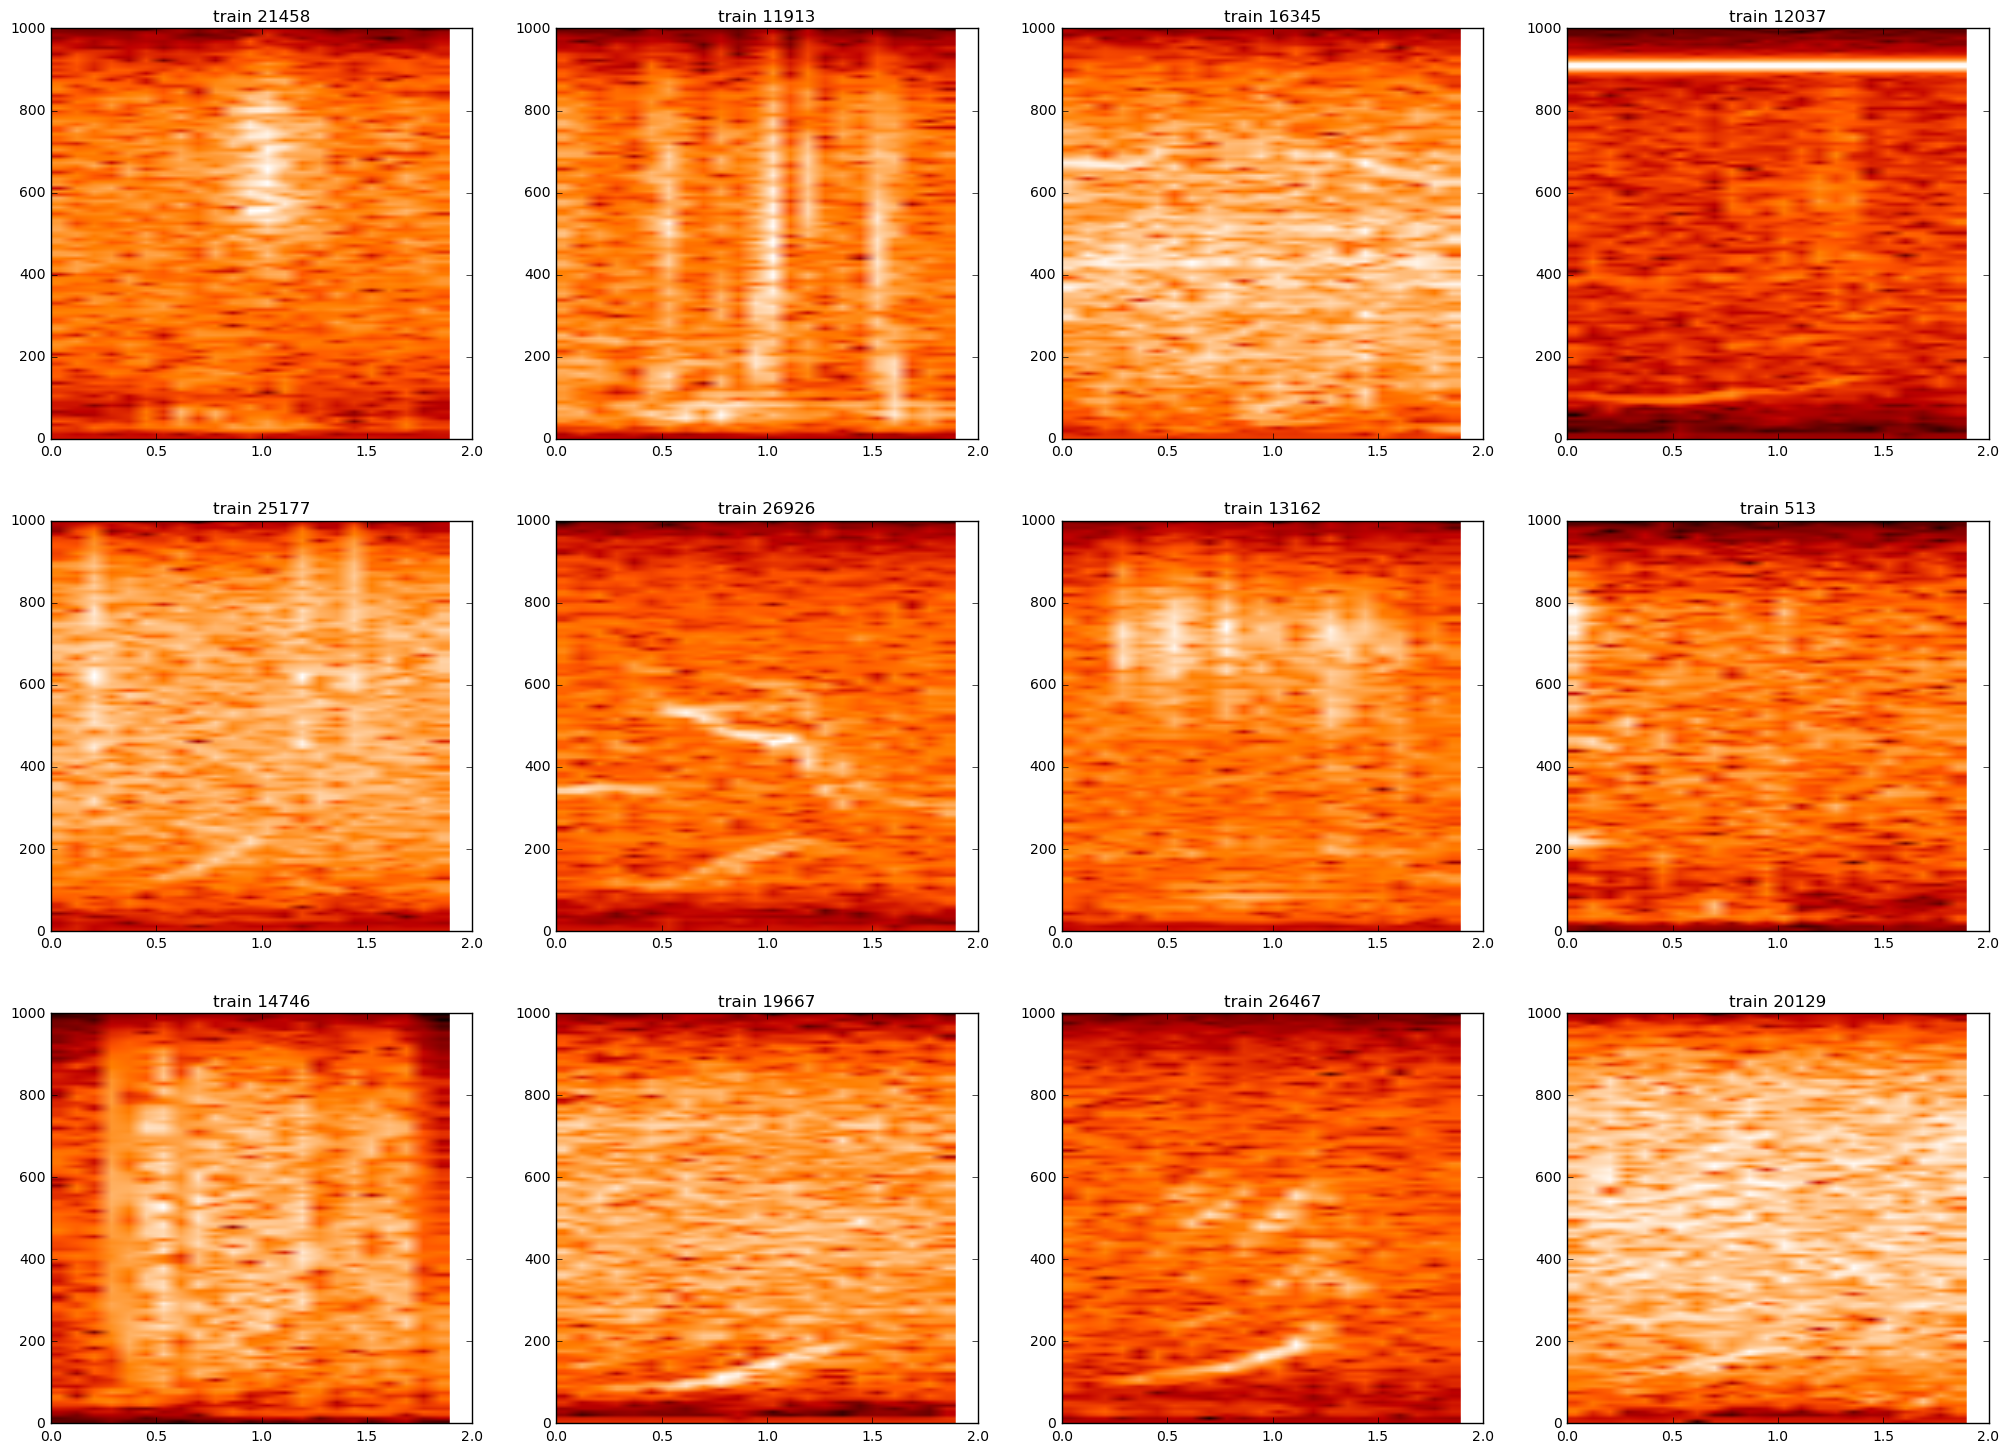

In [65]:
plt.figure(figsize=(25.,18.))
N_plot = 12
for i, file_name in enumerate(random.sample(file_names,N_plot)):
    f = aifc.open(os.path.join(data_loc,train_folder,file_name), 'r')
    str_frames = f.readframes(f.getnframes())
    Fs = f.getframerate()
    time_data = np.fromstring(str_frames, np.short).byteswap()
    f.close()
 
    # spectrogram of file
    plt.subplot(N_plot/4, 4, i+1)
    Pxx, freqs, bins, im = plt.specgram(time_data,Fs=Fs,noverlap=90,cmap=plt.cm.gist_heat)
    plt.title(train_folder +' ' + get_file_sequence(file_name, train_folder) )

In [37]:
def compute_specgram(time_data): 
    '''Compute the spectogram for time_data'''
    return Pxx, freqs, bins, im = plt.specgram(time_data,Fs=Fs,noverlap=90,cmap=plt.cm.gist_heat)
def get_time_data(data_loc,train_folder,file_name):
    ''' Retrieves time data from the aiff file'''
    f = aifc.open(os.path.join(data_loc,train_folder,file_name), 'r')
    str_frames = f.readframes(f.getnframes())
    Fs = f.getframerate()
    time_data = np.fromstring(str_frames, np.short).byteswap()
    f.close()
    return time_data

0

train21917.aiff


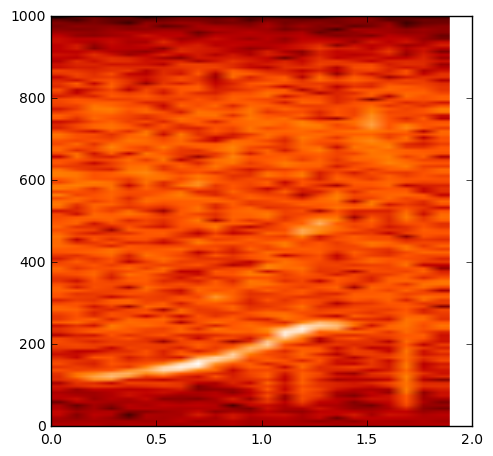

In [79]:
plt.figure(figsize=(25.,18.), dpi=250)
file_name = random.sample(file_names,1)[0]
print file_name
f = aifc.open(os.path.join(data_loc,train_folder, file_name), 'r')
str_frames = f.readframes(f.getnframes())
Fs = f.getframerate()
time_data = np.fromstring(str_frames, np.short).byteswap()
f.close()
 
    # spectrogram of file
plt.subplot(N_plot/4, 4, i+1)
Pxx, freqs, bins, im = plt.specgram(time_data,Fs=Fs,noverlap=90,cmap=plt.cm.gist_heat)

plt.savefig(data_loc + '/'+ train_folder + '/'+ file_name.split('.')[0] + '.png', bbox_inches='tight')
plt.savefig(data_loc + '/'+ file_name.split('.')[0] + '.png', bbox_inches='tight')
#plt.imsave(data_loc + '/'+ file_name.split('.')[0] + '_im.png', Pxx)

In [39]:
batch_size = 50
hidden_nodes=1024
graph = tf.Graph()

beta_array = [0.002]

for beta in beta_array:
    with graph.as_default():

      # Input data. For the training data, we use a placeholder that will be fed
      # at run time with a training minibatch.
      tf_train_dataset = tf.placeholder(tf.float32,
                                        shape=(batch_size, image_size * image_size))
      tf_train_labels = tf.placeholder(tf.float32, shape=(batch_size, num_labels))
      tf_valid_dataset = tf.constant(valid_dataset)
      tf_test_dataset = tf.constant(test_dataset)

        # Variables.
      weights1 = tf.Variable(
                tf.truncated_normal([image_size * image_size, hidden_nodes]))
      biases1 = tf.Variable(tf.zeros([ hidden_nodes]))
      weights2 = tf.Variable(tf.truncated_normal([hidden_nodes,num_labels]))
      biases2 = tf.Variable(tf.zeros([num_labels]))


      def forward_prop(inp):
            h1 = tf.nn.relu(tf.matmul(inp, weights1)+biases1)
            
            return tf.matmul(h1,weights2) + biases2

      # Training computation.
      keep_prob = 0.5
      logits =  tf.nn.dropout(forward_prop(tf_train_dataset), keep_prob)

      print("beta: %.3f...\n"%beta)
    
      R = tf.nn.l2_loss(weights1)+tf.nn.l2_loss(weights2)+tf.nn.l2_loss(biases1)+tf.nn.l2_loss(biases2)
 
      loss = tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits(logits, tf_train_labels)+ beta*R)

      # Optimizer.
      global_step = tf.Variable(0)  # count the number of steps taken.
      learning_rate = tf.train.exponential_decay(0.1, global_step, 100000, 0.75, staircase=True)
      # tf.train.exponential_decay(learning_rate, global_step, decay_steps, decay_rate, staircase=False, name=None)
      optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss, global_step=global_step)

      # Predictions for the training, validation, and test data.
      train_prediction = tf.nn.softmax(logits)
      valid_prediction = tf.nn.softmax(forward_prop(tf_valid_dataset))
      test_prediction = tf.nn.softmax(forward_prop(tf_test_dataset))

    num_steps = 8001

    with tf.Session(graph=graph) as session:
      tf.initialize_all_variables().run()
      print("Initialized")
      for step in range(num_steps):
        # Pick an offset within the training data, which has been randomized.
        # Note: we could use better randomization across epochs.
        offset = (step * batch_size) % (train_labels.shape[0] - batch_size)
        # Generate a minibatch.
        batch_data = train_dataset[offset:(offset + batch_size), :]
        batch_labels = train_labels[offset:(offset + batch_size), :]
        # Prepare a dictionary telling the session where to feed the minibatch.
        # The key of the dictionary is the placeholder node of the graph to be fed,
        # and the value is the numpy array to feed to it.
        feed_dict = {tf_train_dataset : batch_data, tf_train_labels : batch_labels}
        _, l, predictions = session.run(
          [optimizer, loss, train_prediction], feed_dict=feed_dict)
        if (step % 500 == 0):
          print("Minibatch loss at step %d: %f" % (step, l))
          print("Minibatch accuracy: %.1f%%" % accuracy(predictions, batch_labels))
          print("Validation accuracy: %.1f%%" % accuracy(
            valid_prediction.eval(), valid_labels))
      print("Test accuracy: %.1f%%" % accuracy(test_prediction.eval(), test_labels))
      print("\n \n")

array([16061, 16973, 10870,  7168, 15637, 15081, 12740, 14861, 25481,
       21577, 16632, 10502])

In [41]:
file_names[np.random.randint(0, len(file_names), N_plot)]

TypeError: only integer arrays with one element can be converted to an index

array(['train28639.aiff', 'train7900.aiff', 'train5742.aiff',
       'train25451.aiff', 'train27888.aiff', 'train8813.aiff',
       'train18317.aiff', 'train15194.aiff', 'train23640.aiff',
       'train8313.aiff', 'train6801.aiff', 'train4149.aiff'], 
      dtype='|S15')